<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#f25625">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Temas Selectos de Ingeniería en Computación III</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2025-1</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="6" color="#f25625">Laboratorio 5: Algoritmos Cuanticos III</font></td>
    </tr>
</table>

<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        </td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Alumno: Brandon Garay Jacome</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">421081646</font></td>
    </tr>
</table>


<a id="1"></a>
# 1. Ejercicio 1

1. Determina el valor de la cadena oculta `s`:
   1. Ejecuta la siguiente celda de código, esta definirá una función llamada `bv_oracle()` que no recibe parámetros y devuelve un circuito cuántico que codifica una cadena `s` de $5$ bits.
      1. `bv_oracle()` representa $U_f$ en el algoritmo de Bernstein–Vazirani.
      2. Dibuja el circuito que regresa la función `bv_oracle()`.
   2. Implementa todo el algoritmo de Bernstein–Vazirani para determinar la cadena `s`.
      1. Considera que el qubit de más a la derecha ($q_0$) es el qubit auxiliar.
      2. Comprueba la estructura del circuito de $U_f$ dibujando tu circuito. ¿Puedes comprobar si tu resultado es correcto (o no) solo observando este circuito?
      3. Usa el parámetro `inplace=True` del método `compose()` de la clase `QuantumCircuit` para agregar el circuito del oráculo en el punto deseado (paso 3).
   3. Realiza la simulación del circuito usando la clase `BasicSimulator` (como en el ejemplo de este Lab5).
       - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
   4. Responde claramente cuál es la cadena oculta `s`.
       - Usa una celda de markdown, en donde escribas la cadena $s$ tu mismo(a) a modo de conclusión.

##### Celda oculta que define la función `bv_oracle()`

No olvides ejecutar la siguiente celda de código ([ofuscado](https://es.wikipedia.org/wiki/Ofuscaci%C3%B3n#Motivaci%C3%B3n)) para cargar la función del Oracle.

In [1]:
exec(bytes.fromhex('0a66726f6d207169736b697420696d706f7274205175616e74756d436972637569740a0a6465662062765f6f7261636c6528293a0a2020202073203d20223131303130220a202020206e203d206c656e2873290a2020202073203d20735b3a3a2d315d202320726576657274696d6f73206c6120636164656e612079612071756520735f3020657374c3a12061206c6120697a7175696572646120736567c3ba6e20507974686f6e2c7920656e206c61206465726563686120736567c3ba6e205169736b69740a0a2020202063697263756974203d205175616e74756d43697263756974286e202b2031290a20202020636972637569742e6261727269657228290a0a20202020666f72206920696e2072616e6765286e293a0a2020202020202020696620735b695d203d3d202731273a0a202020202020202020202020636972637569742e63782869202b20312c2030290a0a20202020636972637569742e6261727269657228290a2020202072657475726e20636972637569740a20202020'))

<a id="1"></a>
## 1.1. Codigo del Algoritmo

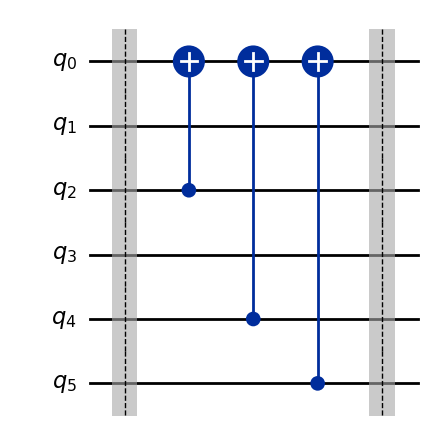

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

oraculo = bv_oracle()
oraculo.draw('mpl')

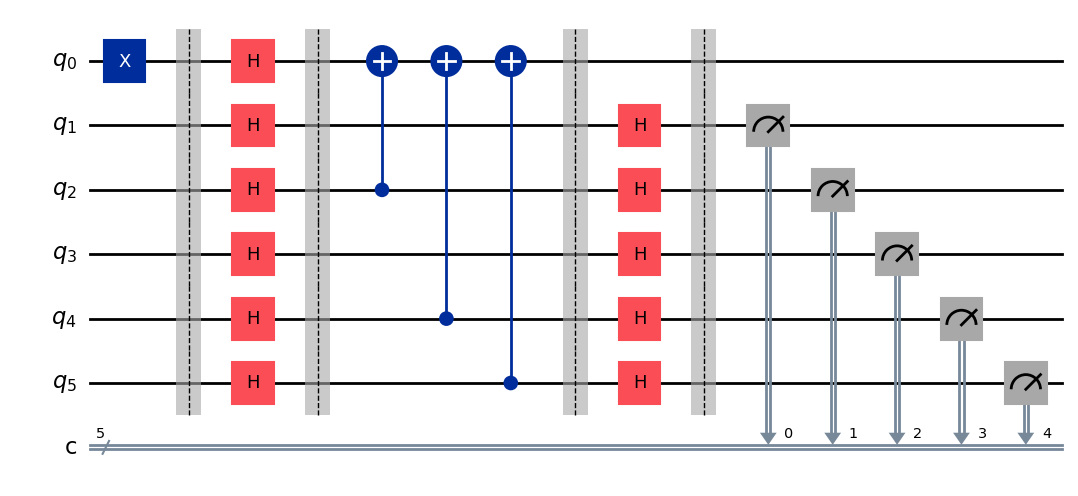

In [3]:
n = 5  # Longitud de la cadena

# Crear el circuito con n+1 qubits y n bits clásicos
circuit = QuantumCircuit(n + 1, n)

# Inicializar el qubit auxiliar en |1>
circuit.x(0)
circuit.barrier()

# Aplicar Hadamard a todos los qubits
for i in range(n + 1): circuit.h(i)

# Oráculo
bv_circuit = circuit.compose(oraculo)

# Hadamard a todos menos al auxiliar
for j in range(1, n + 1): 
  bv_circuit.h(j)

bv_circuit.barrier()

# Medir qubits (sin incluir el auxiliar)
for k in range(n):
 bv_circuit.measure(k + 1, k)

# Visualizar el circuito
bv_circuit.draw('mpl')


<a id="1"></a>
#### ¿Puedes comprobar si tu resultado es correcto (o no) solo observando este circuito?

Sí, se puede comprobar si el resultado es correcto solo observando el circuito, si el oráculo está explícitamente implementado y se pueden ver las compuertas que lo conforman. En particular, si el oráculo utiliza compuertas CNOT con el qubit auxiliar como objetivo, la posición de los qubits de control indica en qué posiciones hay un 1 en la cadena secreta 
𝑠
s. Al analizar estas CNOTs (de abajo hacia arriba en la visualización estándar de Qiskit), se puede reconstruir 
𝑠
s y verificar si el resultado del algoritmo coincide con ella.

<a id="1"></a>
## 1.2. Simulacion

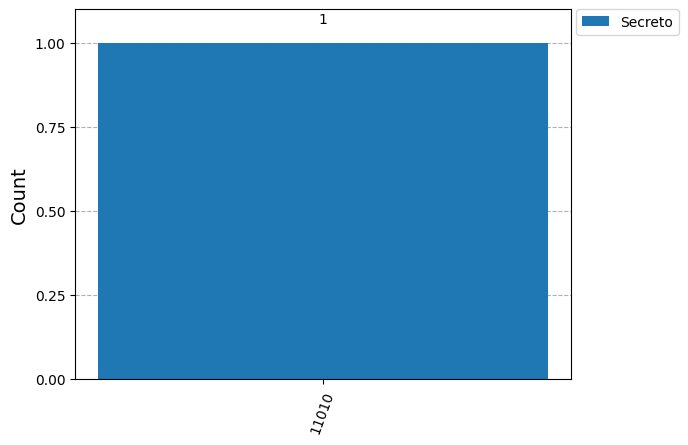

In [4]:
# Simulador
simulador = BasicSimulator()

# Ejecutar el circuito (una vez)
resultado = simulador.run(bv_circuit, shots=1)

# Resultados
medidas = resultado.result().get_counts()

plot_histogram([medidas], legend=["Secreto"])


Resultado `s` =$11010$

La implementación del algoritmo de Bernstein–Vazirani demuestra que se puede recuperar la cadena secreta 
𝑠 de manera eficiente, realizando únicamente una ejecución del circuito cuántico.

<a id="1"></a>
# 2. Ejercicio 2

2. Realiza el algoritmo de Grover para $n=5$.
   1. Haz una función de oráculo que marque los elementos $|01100\rangle$, $|11001\rangle$ y $|01010\rangle$.
   2. Ejecuta el algorimto completo y comprueba que dichos elementos fueron encontrados por el algoritmo de búsqueda de Grover.
      - Realiza los mismos pasos que en el ejemplo de este Lab5.
   4. Recuerda que debes determinar el número apropiado de iteraciones a usar en tu algoritmo.
   5. Realiza la simulación del circuito usando la clase `StatevectorSampler` (como en el ejemplo de este Lab5).
      - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
     
$$ $$

<a id="1"></a>
## 2.1. Codigo del Algoritmo

In [8]:
def aplicar_oraculo(circuito, registro, auxiliar):

    # Aplicar operaciones para el patrón 01100
    circuito.x(registro[0])
    circuito.x(registro[1])
    circuito.x(registro[4])
    circuito.mcx(registro, auxiliar)
    circuito.x(registro[0])
    circuito.x(registro[1])
    circuito.x(registro[4])
    circuito.barrier()

    # Aplicar operaciones para el patrón 11001
    circuito.x(registro[1])
    circuito.x(registro[2])
    circuito.mcx(registro, auxiliar)
    circuito.x(registro[1])
    circuito.x(registro[2])
    circuito.barrier()

    # Aplicar operaciones para el patrón 01010
    circuito.x(registro[0])
    circuito.x(registro[2])
    circuito.x(registro[4])
    circuito.mcx(registro, auxiliar)
    circuito.x(registro[0])
    circuito.x(registro[2])
    circuito.x(registro[4])


In [9]:
def invertir(circuito, registro_cuantico, auxiliar):

    # Aplicar Hadamard al registro cuántico
    circuito.h(registro_cuantico)

    # Aplicar X en el registro cuántico
    circuito.x(registro_cuantico)

    # Aplicar operación de control múltiple
    circuito.mcx(registro_cuantico, auxiliar)

    # Deshacer las operaciones X
    circuito.x(registro_cuantico)
    circuito.x(auxiliar)

    # Volver a aplicar Hadamard al registro cuántico
    circuito.h(registro_cuantico)


In [10]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

def algoritmo_grover(oraculo, n, iteraciones):

    # Crear registros cuánticos y clásicos
    qbits = QuantumRegister(n, 'q')
    auxiliar = QuantumRegister(1, 'a')
    bits_clasicos = ClassicalRegister(n, 'c')

    # Definir el circuito cuántico
    circuito = QuantumCircuit(qbits, auxiliar, bits_clasicos)
    
    # Aplicar Hadamard a los qubits
    circuito.h(qbits)
    
    # Preparar el qubit auxiliar
    circuito.x(auxiliar)
    circuito.h(auxiliar)
    circuito.barrier()
    
    # Iteraciones de Grover
    for _ in range(iteraciones): 
        oraculo(circuito, qbits, auxiliar)  # Oráculo
        circuito.barrier()
        inversion(circuito, qbits, auxiliar)  # Inversión de fase
        circuito.barrier()

    # Preparar el qubit auxiliar para la medición
    circuito.h(auxiliar)
    circuito.x(auxiliar)
    circuito.barrier()

    # Realizar las mediciones
    circuito.measure(qbits, bits_clasicos)

    # Ejecutar la simulación
    numero_muestras = 2500
    simulador = StatevectorSampler()                                  
    resultado_simulacion = simulador.run([circuito], shots=numero_muestras)
    conteos = resultado_simulacion.result()[0].data.medición.get_counts()  
    
    # Mostrar probabilidades
    for resultado in conteos:
        print(f"El elemento {resultado} tiene probabilidad {conteos[resultado]/numero_muestras}")

    # Mostrar el circuito
    display(circuito.draw(output='mpl'))


El elemento 11001 es observado con probabilidad 0.344
El elemento 01010 es observado con probabilidad 0.3136
El elemento 01100 es observado con probabilidad 0.3424


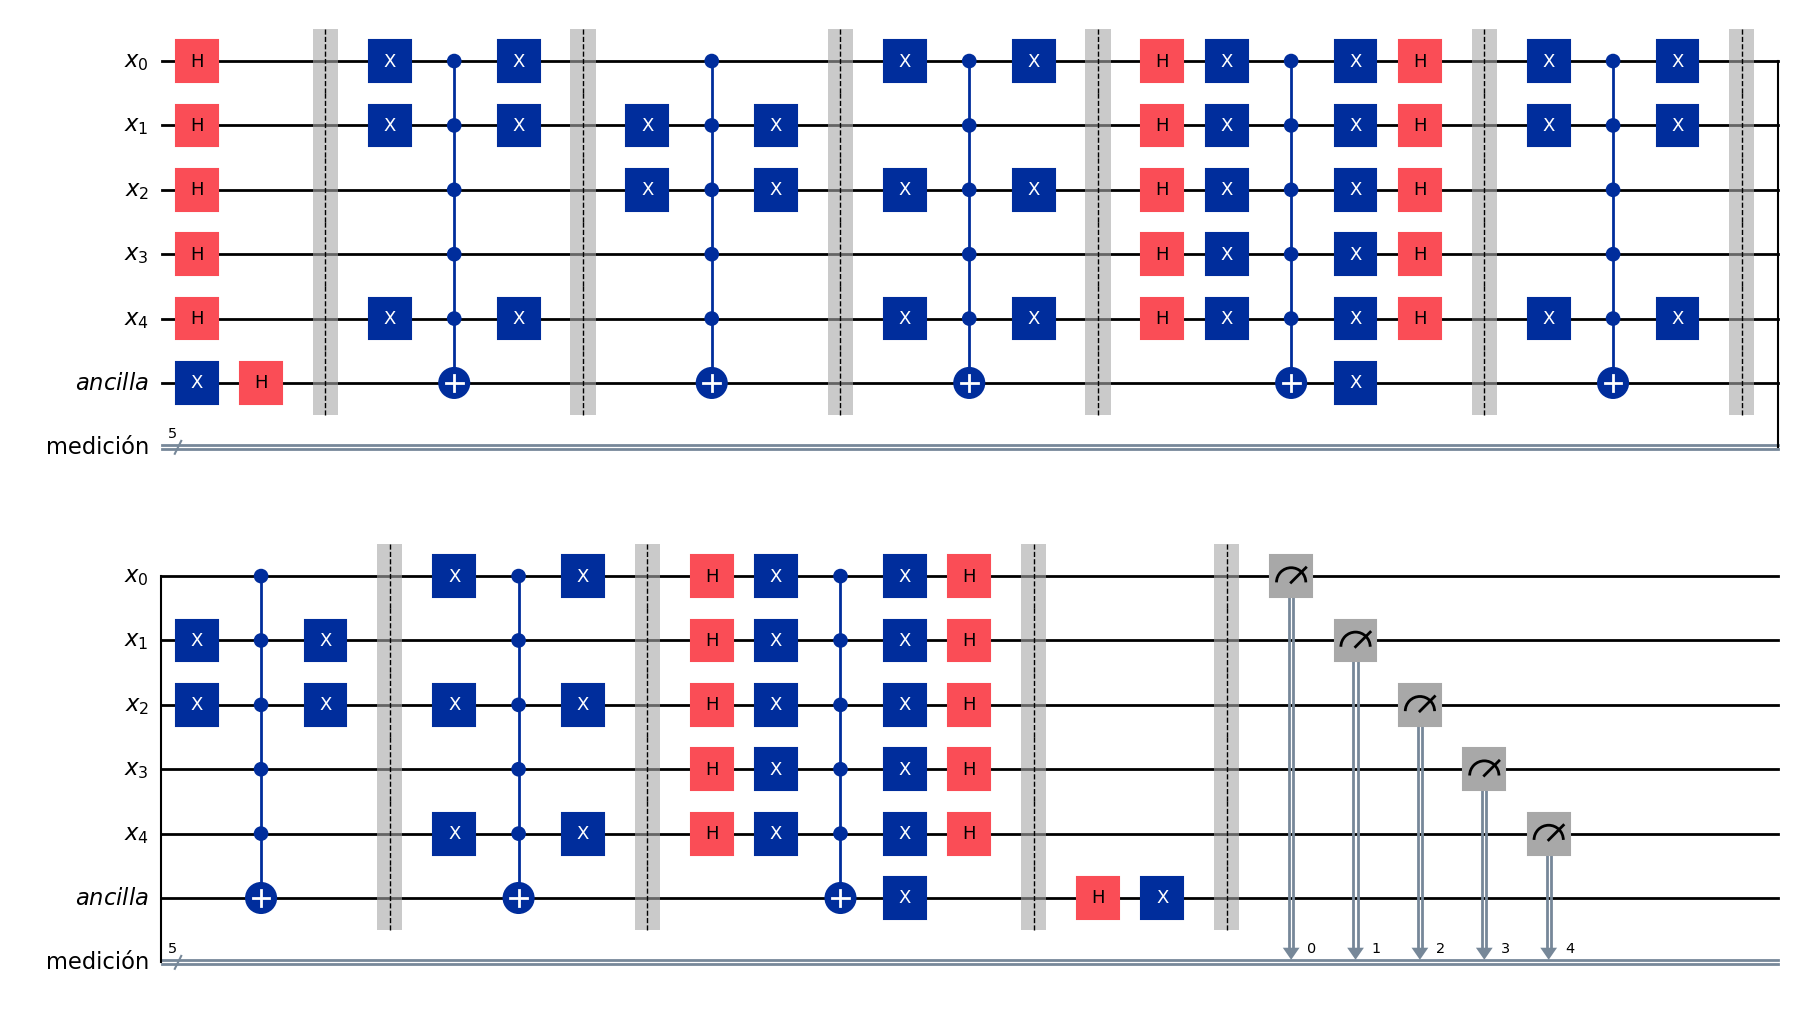

In [11]:
grover(Uf_01100_11001_01010, n=5, iterations=2)

<a id="1"></a>
# 3. Ejercicio 3


3. **[Opcional]** Descubre los elementos marcados en un circuito más grande.
   
   Para este ejercicio se provee una gran parte de la implementación del algoritmo de Grover, deberás completar algunos aspectos solamente (fíjate en las líneas con comentarios que comienzan con `???`).
   
   Ejecuta la siguiente celda de código, esta definirá dos funciones:
   - `big_oraculo(circuito, qreg)`: define un oráculo que marca **dos** elementos, recibe el circuito al que se le aplicará el oráculo y el registro cuántico que contiene todos los qubits del circuito.
   - `big_inversion(circuito, qreg)`: define el operador de inversión para este caso particular, recibe el circuito al que se le aplicará la inversión y el registro cuántico que contiene todos los qubits del circuito.
   
   
   Contesta a los siguientes incisos:
   1. Determina el tamaño total del espacio de búsqueda, es decir, el valor de $N$.
      1. Observa cómo se está creando el circuito, se crean dos registros, uno cuántico y otro clásico, el tamaño del espacio de búsqueda es lo que medimos al final.
      2. Escribe en una celda de markdown el valor de $N$ de manera explícita, para que quede claro cual es tu respuesta a este inciso.
   2. Encuentra el número óptimo de iteraciones.
      1. Una vez que determines $N$ podrás calcular la cantidad de iteraciones.
      2. Toma encuenta que el oráculo marca $2$ elementos, este valor te sirve para calcular la cantidad de iteraciones.
      3. Escribe en una celda de markdown la cantidad de iteraciones que calculaste, así como qué hiciste para determinar esa cantidad.
   3. Realiza la simulación del circuito usando la clase `StatevectorSampler` (como en el ejemplo de este Lab5).
      1. Debes crear el objeto correcto.
      2. Debes obtener los conteos de la ejecución.
      - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
   4. Indica cuáles son los elementos que encuentra el algoritmo de Grover.
      1. Revisa lo que imprime el código al final y deberás notar claramente $2$ elementos con una cantidad mayor de conteos.
      2. Indica explícitamente en una celda de markdown cuáles son los elementos encontrados.
      3. Convierte las cadenas de bits en su equivalente en decimal, también escribe este equivalente en markdown.


##### Celda oculta que define las funciones `big_oraculo(circuito, qreg)` y `big_inversion(circuito, qreg)`

No olvides ejecutar la siguiente celda de código ([ofuscado](https://es.wikipedia.org/wiki/Ofuscaci%C3%B3n#Motivaci%C3%B3n)) para cargar las funciones que definen el oráculo y el operador de inversión.

In [15]:
exec(bytes.fromhex('0a646566206269675f6f726163756c6f286369726375697439392c207175616e74756d5f726567293a0a202020206e756d626572733d5b31322c2034355d0a20202020666f72206e756d62657220696e206e756d626572733a0a20202020202020206966286e756d6265722532203d3d2030293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b305d290a20202020202020206966286e756d6265722534203c2032293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b315d290a20202020202020206966286e756d6265722538203c2034293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b325d290a20202020202020206966286e756d626572253136203c2038293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b335d290a20202020202020206966286e756d626572253332203c203136293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b345d290a20202020202020206966286e756d626572253634203c203332293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b355d290a20202020202020206966286e756d62657225313238203c203634293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b365d290a20202020202020206966286e756d62657225323536203c20313238293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b375d290a20202020202020206966286e756d62657225353132203c20323536293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b385d290a20202020202020206966286e756d626572203c20353132293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b395d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b305d2c207175616e74756d5f7265675b315d2c207175616e74756d5f7265675b31385d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b325d2c207175616e74756d5f7265675b335d2c207175616e74756d5f7265675b31315d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b345d2c207175616e74756d5f7265675b355d2c207175616e74756d5f7265675b31325d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b365d2c207175616e74756d5f7265675b375d2c207175616e74756d5f7265675b31335d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b385d2c207175616e74756d5f7265675b395d2c207175616e74756d5f7265675b31345d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31385d2c207175616e74756d5f7265675b31315d2c207175616e74756d5f7265675b31355d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31325d2c207175616e74756d5f7265675b31335d2c207175616e74756d5f7265675b31365d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31355d2c207175616e74756d5f7265675b31365d2c207175616e74756d5f7265675b31375d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31345d2c207175616e74756d5f7265675b31375d2c207175616e74756d5f7265675b31305d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31355d2c207175616e74756d5f7265675b31365d2c207175616e74756d5f7265675b31375d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31325d2c207175616e74756d5f7265675b31335d2c207175616e74756d5f7265675b31365d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b31385d2c207175616e74756d5f7265675b31315d2c207175616e74756d5f7265675b31355d290a0a20202020202020206369726375697439392e636378287175616e74756d5f7265675b385d2c207175616e74756d5f7265675b395d2c207175616e74756d5f7265675b31345d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b365d2c207175616e74756d5f7265675b375d2c207175616e74756d5f7265675b31335d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b345d2c207175616e74756d5f7265675b355d2c207175616e74756d5f7265675b31325d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b325d2c207175616e74756d5f7265675b335d2c207175616e74756d5f7265675b31315d290a20202020202020206369726375697439392e636378287175616e74756d5f7265675b305d2c207175616e74756d5f7265675b315d2c207175616e74756d5f7265675b31385d290a0a20202020202020206966286e756d6265722532203d3d2030293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b305d290a20202020202020206966286e756d6265722534203c2032293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b315d290a20202020202020206966286e756d6265722538203c2034293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b325d290a20202020202020206966286e756d626572253136203c2038293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b335d290a20202020202020206966286e756d626572253332203c203136293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b345d290a20202020202020206966286e756d626572253634203c203332293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b355d290a20202020202020206966286e756d62657225313238203c203634293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b365d290a20202020202020206966286e756d62657225323536203c20313238293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b375d290a20202020202020206966286e756d62657225353132203c20323536293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b385d290a20202020202020206966286e756d626572203c20353132293a0a2020202020202020202020206369726375697439392e78287175616e74756d5f7265675b395d290a20202020'))

exec(bytes.fromhex('0a646566206269675f696e76657273696f6e286369726375697439392c207175616e74756d5f726567293a0a20202020666f72206920696e2072616e6765283130293a0a20202020202020206369726375697439392e68287175616e74756d5f7265675b695d290a20202020202020206369726375697439392e78287175616e74756d5f7265675b695d290a0a202020206369726375697439392e636378287175616e74756d5f7265675b305d2c207175616e74756d5f7265675b315d2c207175616e74756d5f7265675b31385d290a202020206369726375697439392e636378287175616e74756d5f7265675b325d2c207175616e74756d5f7265675b335d2c207175616e74756d5f7265675b31315d290a202020206369726375697439392e636378287175616e74756d5f7265675b345d2c207175616e74756d5f7265675b355d2c207175616e74756d5f7265675b31325d290a202020206369726375697439392e636378287175616e74756d5f7265675b365d2c207175616e74756d5f7265675b375d2c207175616e74756d5f7265675b31335d290a202020206369726375697439392e636378287175616e74756d5f7265675b385d2c207175616e74756d5f7265675b395d2c207175616e74756d5f7265675b31345d290a202020200a202020206369726375697439392e636378287175616e74756d5f7265675b31385d2c207175616e74756d5f7265675b31315d2c207175616e74756d5f7265675b31355d290a202020206369726375697439392e636378287175616e74756d5f7265675b31325d2c207175616e74756d5f7265675b31335d2c207175616e74756d5f7265675b31365d290a202020200a202020206369726375697439392e636378287175616e74756d5f7265675b31355d2c207175616e74756d5f7265675b31365d2c207175616e74756d5f7265675b31375d290a202020206369726375697439392e636378287175616e74756d5f7265675b31345d2c207175616e74756d5f7265675b31375d2c207175616e74756d5f7265675b31305d290a202020206369726375697439392e636378287175616e74756d5f7265675b31355d2c207175616e74756d5f7265675b31365d2c207175616e74756d5f7265675b31375d290a202020200a202020206369726375697439392e636378287175616e74756d5f7265675b31325d2c207175616e74756d5f7265675b31335d2c207175616e74756d5f7265675b31365d290a202020206369726375697439392e636378287175616e74756d5f7265675b31385d2c207175616e74756d5f7265675b31315d2c207175616e74756d5f7265675b31355d290a202020200a202020206369726375697439392e636378287175616e74756d5f7265675b385d2c207175616e74756d5f7265675b395d2c207175616e74756d5f7265675b31345d290a202020206369726375697439392e636378287175616e74756d5f7265675b365d2c207175616e74756d5f7265675b375d2c207175616e74756d5f7265675b31335d290a202020206369726375697439392e636378287175616e74756d5f7265675b345d2c207175616e74756d5f7265675b355d2c207175616e74756d5f7265675b31325d290a202020206369726375697439392e636378287175616e74756d5f7265675b325d2c207175616e74756d5f7265675b335d2c207175616e74756d5f7265675b31315d290a202020206369726375697439392e636378287175616e74756d5f7265675b305d2c207175616e74756d5f7265675b315d2c207175616e74756d5f7265675b31385d290a0a20202020666f72206920696e2072616e6765283130293a0a20202020202020206369726375697439392e78287175616e74756d5f7265675b695d290a20202020202020206369726375697439392e68287175616e74756d5f7265675b695d290a202020200a202020206369726375697439392e78287175616e74756d5f7265675b31305d290a20202020'))



<a id="1"></a>
## 3.1. Correccion del Algoritmo

In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.primitives import StatevectorSampler

qreg_big = QuantumRegister(19)               # nota que no hay un registro separado para la ancilla u otros qubits auxiliares
creg_big = ClassicalRegister(10, "med")      # la medición se llama 'med', necesario saberlo para la simulación con StatevectorSampler

big_grover = QuantumCircuit(qreg_big, creg_big)



# paso inicial - igual superposición
                                            # debido a que la ancilla no está separada, 
                                            # debemos indicar a cuántos qubits aplicar H
for i in range(10):                           # ??? completa esta línea <- aquí usa la respuesta del inciso A
    big_grover.h(qreg_big[i])



# iniciar ancilla en |->
                                            # inicia el qubit que está inmediatamente después de los qubits
                                            # que representan los elementos (los que se pusieron en superposición)
big_grover.x(qreg_big[10])                  # ??? indica el indice correcto (solo es uno) <- aquí usa la respuesta del inciso A
big_grover.h(qreg_big[10])                  # ??? indica el indice correcto (solo es uno) <- aquí usa la respuesta del inciso A



# Iteraciones de Grover
         
iteraciones = 17                              # ??? completa esta línea <- aquí usa la respuesta del inciso B

for i in range(iteraciones):

    # consulta (query)
    big_oraculo(big_grover, qreg_big)       # recibe el circuito y el registro cuántico

    # inversión
    big_inversion(big_grover, qreg_big)     # recibe el circuito y el registro cuántico



# regresar el ancilla a |0>
                                            # inicia el qubit que está inmediatamente después de los qubits
                                            # que representan los elementos 
big_grover.h(qreg_big[10])                  # ??? indica el indice correcto (solo es uno) <- aquí usa la respuesta del inciso A
big_grover.x(qreg_big[10])                  # ??? indica el indice correcto (solo es uno) <- aquí usa la respuesta del inciso A



# medición
                                            # debido a que la ancilla no está separada, 
                                            # debemos indicar cuántos qubits medir
for i in range(10):                         # ??? completa esta línea <- aquí usa la respuesta del inciso A
    big_grover.measure(qreg_big[i], creg_big[i])



# simulación
sampler = StatevectorSampler()              # ??? crear objeto de tipo StatevectorSampler, completa esta línea (inciso C)

shots = 2500                                # puedes usar otra cantidad de shots

job_sampler = sampler.run([big_grover], shots=shots)
conteos = job_sampler.result()[0].data.med.get_counts()                     # ??? obtén los conteos, completa esta línea (inciso C)



# imprimir los resultados obtenidos de la simulación
for bitstring in conteos:
    print(bitstring, "es observado", conteos[bitstring], "veces")  # esto te sirve para contestar el inciso D


0000001100 es observado 1271 veces
0000101101 es observado 1229 veces


<a id="1"></a>
## 3.2. Justificacion

<a id="1"></a>
#### Tamaño total

El tamaño completo del espacio de búsqueda se representa de forma indirecta mediante los bits clásicos del circuito, ya que estos son los encargados de registrar las mediciones correspondientes a los 
𝑁
N elementos posibles. En este caso, al utilizar 10 bits clásicos, se concluye que:


$N = 2^{10} = 1024$

<a id="1"></a>
#### Espacio de Busquedas

Dado que se tiene un valor de $N = 2^{10}$ y $2$y existen 2 elementos marcados, el número de iteraciones necesarias se calcula con la fórmula:

$\pi \dfrac{\sqrt{\frac{2^{10}}{2}}}{4} = 17.77 \approx 17$

Por lo tanto, se deben realizar **17 iteraciones** en el algoritmo.


<a id="1"></a>
#### Cuáles son los elementos que encuentra el algoritmo de Grover.


1. $0000101101 = 45$
2. $0000001100 = 12$